In [2]:
import os, sys
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.insert(0,'..')
from analysis.analysis_utils import *


### extract data from trained models

In [7]:
mod_dir = os.getcwd()+"/../models/sweep_main"
files_and_directories = os.listdir(mod_dir)


freqs = np.array([1.5,2.04,2.75,3.73])
training_dur = [[] for i in range(4)]
for findex, fname in enumerate(files_and_directories):
    
    
    """Load Model"""
    model_dir = os.path.join(mod_dir, fname)

    if model_dir[-3:] != 'ore':
        var = scipy.io.loadmat(model_dir)
        f=var['lossF'][0][0]
        print("FREQUENCY = " + str(f))
        ind=np.argwhere(f==freqs)[0][0]
        print(ind)
        dur=len(var['train_perf_list'])

        print("duration = " + str(dur))


        training_dur[ind].append(dur)

FREQUENCY = 2.75
2
duration = 713
FREQUENCY = 2.04
1
duration = 1810
FREQUENCY = 1.5
0
duration = 2856
FREQUENCY = 3.73
3
duration = 1868
FREQUENCY = 1.5
0
duration = 1019
FREQUENCY = 2.04
1
duration = 745
FREQUENCY = 2.75
2
duration = 3222
FREQUENCY = 2.04
1
duration = 1152
FREQUENCY = 2.75
2
duration = 2411
FREQUENCY = 3.73
3
duration = 7655
FREQUENCY = 1.5
0
duration = 3084
FREQUENCY = 3.73
3
duration = 831
FREQUENCY = 2.75
2
duration = 1918
FREQUENCY = 3.73
3
duration = 2274
FREQUENCY = 2.04
1
duration = 308
FREQUENCY = 2.04
1
duration = 3753
FREQUENCY = 2.75
2
duration = 627
FREQUENCY = 1.5
0
duration = 1108
FREQUENCY = 1.5
0
duration = 575
FREQUENCY = 3.73
3
duration = 354
FREQUENCY = 2.04
1
duration = 1086
FREQUENCY = 2.75
2
duration = 500
FREQUENCY = 3.73
3
duration = 689
FREQUENCY = 1.5
0
duration = 414
FREQUENCY = 1.5
0
duration = 605
FREQUENCY = 1.5
0
duration = 811
FREQUENCY = 3.73
3
duration = 2874
FREQUENCY = 3.73
3
duration = 6001
FREQUENCY = 3.73
3
duration = 3468
FREQU

### Calculate means and standard errors

In [8]:
mean_tr = np.mean(np.array(training_dur)*100, axis=1)
sem_tr = np.std(np.array(training_dur)*100, axis=1)/np.sqrt(10)

### Make plot

In [14]:
from matplotlib.colors import colorConverter as cc


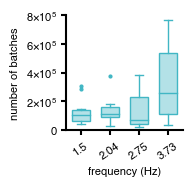

In [25]:
pltcolors, pltcolors_alt = steffiscolours()

with mpl.rc_context(fname="matplotlibrc"):
    plt.subplots(figsize=(1.5, 1.5))


    ax1 = plt.subplot(111, facecolor="white")  # , projection='polar')
    c = pltcolors_alt[1]
    alpha = 0.4
    ax1.boxplot(np.array(training_dur).T*100, widths =.6, patch_artist=True,
                            boxprops=dict(facecolor=cc.to_rgba(c, alpha=alpha), color=c),
                            capprops=dict(color=c),
                            whiskerprops=dict(color=c),
                            medianprops=dict(color=c),
                            flierprops={'marker': 'o', 'markersize': 2, 'markerfacecolor':c, 'markeredgecolor':c})#, color=colors,
                    #yerr=ph)#, color=pltcolors_alt[1],
            #yerr=sem_tr, 
            #align='edge',  ecolor=pltcolors_alt[-1], capsize=4, label =['Freq: '+ str(freqs[i]) for i in range(4)])
   
    ax1.set_ylim(0)#, 35)
    #ax1.set_xlim(0)#, 35)
    ax1.set_yticks(np.arange(0,900000,200000))
    labs = [str(i) + r"$\times 10^5$" for i in np.arange(0,9,2)]
    labs[0]=str(0)
    ax1.set_yticklabels(labs)



    ax1.set_xticks(np.arange(4)+1)
    plt.xticks(rotation=35)

    ax1.set_xticklabels([str(fr) for fr in freqs])
    ax1.set_ylabel("number of batches")
    ax1.set_xlabel("frequency (Hz)")
plt.savefig("../figures/S2a.svg")



In [ ]:
pltcolors, pltcolors_alt = steffiscolours()

with mpl.rc_context(fname="matplotlibrc"):
    plt.subplots(figsize=(2, 2))


    ax1 = plt.subplot(111, facecolor="white")  # , projection='polar')
    
    ax1.bar(np.arange(4),mean_tr, color=pltcolors_alt[1],
            yerr=sem_tr, 
            align='edge',  ecolor=pltcolors_alt[-1], capsize=4, label =['Freq: '+ str(freqs[i]) for i in range(4)])
   
    ax1.set_ylim(0)#, 35)
    #ax1.set_xlim(0)#, 35)
    ax1.set_yticks(np.arange(0,500000,100000))
    labs = [str(i) + r"$*10^5$" for i in np.arange(0,5)]
    labs[0]=str(0)
    ax1.set_yticklabels(labs)



    ax1.set_xticks(np.arange(4)+0.5)
    plt.xticks(rotation=35)

    ax1.set_xticklabels([str(fr) for fr in freqs])
    ax1.set_ylabel("number of batches")
    ax1.set_xlabel("frequency (Hz)")


